In [179]:
## functions:
#calculate the workload of nodes  the betweeness of a node and set the weight to that
#calculate the betweeness of nodes 
#delete the node with the max betweeness or random
#keep number of connected componets and the number of nodes in the biggest component in list so that we can plot it
#distribute the weights of the deleted node to its neighbours
#repeat steps until the number of nodes in biggest connected component is below 50% or some other criteria



In [180]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import powerlaw as pl
import random

In [181]:
#Loading the data
G=nx.read_gml('power.gml', label='id')

#some parameters
Change = 50
Max_workload_P = 2

In [182]:
##We calculate the Pagetank which we base the initial workload and max work on 
pagerank = nx.pagerank(G)
p_arr = np.array([pagerank[v] for v in G.nodes])
removed_nodes = []
workload=p_arr
max_work=workload*Max_workload_P

In [183]:
##Delete func, also checks for overloads after deleting and distributing the workload
def del_node(node):
    neighbors_list = list(nx.neighbors(G, node))
    extra_weight=workload[node]/len(neighbors_list)
    workload[node]=0
    removed_nodes.append([node,neighbors_list])
    G.remove_node(node)
    for nodes in neighbors_list:
        workload[nodes]=workload[nodes]+extra_weight
        if workload[nodes]>max_work[nodes]:
            if nodes in G:
                del_node(nodes)

In [184]:
#We find the node with highest pagerank and delete it. pagerank recalculated each time
def max_node():
    pagerank = nx.pagerank(G)
    max_node = max(pagerank, key = pagerank.get)
    del_node(max_node)

    #an intersting thing could be just go after the ones with the biggest max workloads
    #So go after the initial pagerank instead of recalculating each time, to compare and see if it gives a different result

In [185]:
#chooses a random node to delete
def random_node():
    r_node = random.choice(list(G.nodes))
    del_node(r_node)

In [186]:
#with a % change to add a random deleted note back in to the network. takes workload from its neighbors 
def rebuild(change):
    if removed_nodes != []:
        R = random.randrange(0,100,1)
        if R <= change:
            node, neighbors = random.choice(removed_nodes)
            G.add_node(node)
            for nodes in neighbors:
                if nodes in G:
                    G.add_edge(node, nodes)
                    E_work = workload[nodes]/len(neighbors)
                    workload[nodes] -= E_work
                    workload[node] += E_work
            if workload[node] > max_work[node]:
                del_node(node)
            #max_work[node] = workload[node]*Max_workload_P             #calculate a new max load based on its new initial workload

C:\Users\luka1\AppData\Local\Temp\ipykernel_3720\1869411917.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  extra_weight=workload[node]/len(neighbors_list)


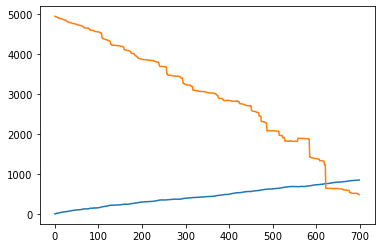

In [187]:
colapse_nr_of_nodes=len(G.nodes())/2
n_components=[]
n_nodes=[]
def plotting():
    x=nx.number_connected_components(G)
    n_components.append(x)
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    y=G0.number_of_nodes()
    n_nodes.append(y)
    rebuild(Change)
    max_node()

n=[]
for i in range(700):
    plotting()
    n.append(i)
    if len(G.nodes())!= 0:
        if n_nodes[i]>colapse_nr_of_nodes:
            z=i
    else:
        print("The graph collapsed after ",i,'the biggest connected component had less then 50% of nodes after',z)
        break

plt.plot(n,n_components)
plt.plot(n,n_nodes)